#USING Q-LEARNING TO SOLVE MAZE PROBLEM:



**So we have a maze of 25*25 dimension, & we want our agent to reach the end point. In doing so it has to avoid the bombs/ghosts, which are moving up & down or right & left. If it comes in contact with any bomb the game is over and agent starts from the beginning. Also there are walls in between, which our agent can't pass. So our agent has to find the fastest route to the finish point.**

In [ ]:
import numpy as np
import operator
import matplotlib.pyplot as plt
%matplotlib inline
import random
import math

In [ ]:
class GridWorld:
    ## Initialise starting data
    def __init__(self):
        # Set information about the gridworld
        self.height = 25                         #it is a 25*25 grid world
        self.width = 25
        self.grid = np.zeros(( self.height, self.width)) - 1    #assigning the rewards for each step i.e. -1 for each step

        #walls
        self.grid[2:21, 5] = -math.inf
        self.grid[2:21,0] = -math.inf
        self.grid[2:21,2] = -math.inf
        self.grid[2:21,8] = -math.inf
        self.grid[5,11:24] = -math.inf
        self.grid[8,11:24] = -math.inf
        self.grid[11, 11:24] = -math.inf
        self.grid[14,11:24] = -math.inf
        self.grid[17,11:24] = -math.inf
        self.grid[20,11:24] = -math.inf
        self.grid[2,11:24] = -math.inf
        self.grid[22,0:23] = -math.inf


        self.current_location = (0,0)    #Our robot will start at (0,0) location
        self.End_location = (24,0)       #where robot has to reach

        #bombs/ghosts in our way
        self.ghost_location = (18,4)
        self.ghost_location_2 = (6,6)
        self.ghost_location_3 = (15,7)
        self.ghost_location_4 = (2,10)
        self.ghost_location_5 = (11,24)
        self.ghost_location_6 = (21,8)
        self.ghost_location_7 = (1,18)
        self.terminal_states = [self.End_location,self.ghost_location,self.ghost_location_2,self.ghost_location_3,self.ghost_location_4,
                                self.ghost_location_5,self.ghost_location_6,self.ghost_location_7]   #where our game ends

        # Set grid rewards for special cells
        self.grid[ self.ghost_location[0], self.ghost_location[1]] = -100
        self.grid[ self.ghost_location_2[0], self.ghost_location_2[1]] = -100
        self.grid[ self.ghost_location_3[0], self.ghost_location_3[1]] = -100
        self.grid[ self.ghost_location_4[0], self.ghost_location_4[1]] = -100
        self.grid[ self.ghost_location_5[0], self.ghost_location_5[1]] = -100
        self.grid[ self.ghost_location_6[0], self.ghost_location_6[1]] = -100
        self.grid[ self.ghost_location_7[0], self.ghost_location_7[1]] = -100
        self.grid[ self.End_location[0], self.End_location[1]] = 100
        self.grid[ self.current_location[0], self.current_location[1]] = -1

        # Set available actions
        self.actions = ['NORTH', 'SOUTH', 'WEST', 'EAST']


    ## Put methods here:
    def get_available_actions(self):
        """Returns possible actions"""
        return self.actions

    def get_reward(self, new_location):
        """Returns the reward for an input position"""
        return self.grid[ new_location[0], new_location[1]]

    def make_step(self, action):
        """Moves the agent in the specified direction. If agent is at a border, agent stays still
        but takes negative reward. Function returns the reward for the move."""
        # Store previous location
        last_location = self.current_location

        if action == 'NORTH':
            # If agent is at the top, stay still, collect reward
            if last_location[0] == 0 :
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0] - 1, self.current_location[1])       #updating the current location
                if  self.grid[ self.current_location[0], self.current_location[1]] != -math.inf:
                  reward = self.get_reward(self.current_location)                                         #taking reward of the current location
                else:
                  self.current_location = last_location
                  reward = self.get_reward(last_location)
        # DOWN
        elif action == 'SOUTH':
            # If agent is at bottom, stay still, collect reward
            if last_location[0] == self.height - 1:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0] + 1, self.current_location[1])
                if  self.grid[ self.current_location[0], self.current_location[1]] != -math.inf:
                  reward = self.get_reward(self.current_location)
                else:
                  self.current_location = last_location
                  reward = self.get_reward(last_location)
        # LEFT
        elif action == 'WEST':
            # If agent is at the left, stay still, collect reward
            if last_location[1] == 0:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0], self.current_location[1] - 1)
                if  self.grid[ self.current_location[0], self.current_location[1]] != -math.inf:
                  reward = self.get_reward(self.current_location)
                else:
                  self.current_location = last_location
                  reward = self.get_reward(last_location)
        # RIGHT
        elif action == 'EAST':
            # If agent is at the right, stay still, collect reward
            if last_location[1] == self.width - 1:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0], self.current_location[1] + 1)
                if  self.grid[ self.current_location[0], self.current_location[1]] != -math.inf:
                  reward = self.get_reward(self.current_location)
                else:
                  self.current_location = last_location
                  reward = self.get_reward(last_location)
        return reward

    def check_state(self):

        """Check if the agent is in a terminal state, if so return 'END GAME'"""
        if self.current_location in self.terminal_states:
          if self.current_location == self.terminal_states[0]:
            return 'Agent has reached the goal'
          else:
            return 'Caught by bomb'

    def show(self):       #shows the environment
        for i in range(0, self.height):
            print('---------------------------------------------------------------------------------------------------------------------------')
            out = '|'
            for j in range(0, self.width):
                if self.grid[i, j] == -100:
                    token = ' ☠️'                    #bombs/ghosts
                elif self.grid[i, j] == -math.inf:
                    token = '▇'                     #walls
                elif self.grid[i, j] == 100:
                    token = '🍕'                     #final destination
                elif self.grid[i,j] == -1:

                    token = '♛'                     #our agent

                else:
                  token = '_ '                       #rest of grid

                out += token + ' | '
            print(out)
        print('-------------------------------------------------------------------------------------------------------------------------------')

In [ ]:
gw= GridWorld()
gw.show()

---------------------------------------------------------------------------------------------------------------------------
|♛ | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | 
---------------------------------------------------------------------------------------------------------------------------
|_  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  |  ☠️ | _  | _  | _  | _  | _  | _  | 
---------------------------------------------------------------------------------------------------------------------------
|▇ | _  | ▇ | _  | _  | ▇ | _  | _  | ▇ | _  |  ☠️ | ▇ | ▇ | ▇ | ▇ | ▇ | ▇ | ▇ | ▇ | ▇ | ▇ | ▇ | ▇ | ▇ | _  | 
---------------------------------------------------------------------------------------------------------------------------
|▇ | _  | ▇ | _  | _  | ▇ | _  | _  | ▇ | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | _  | 
----------------

#Q-learning initialization:

**Our agent can perform four actions.. North(Up), South(down), East(right), West(left) & can move only one step at a time.**
**We are using q-learning to solve our grid problem.**

In [ ]:
class Q_Agent():
    # Intialise
    def __init__(self, environment, epsilon=.3, alpha=0.3, gamma=.9):
        self.environment = environment
        self.q_table = dict() # Store all Q-values in dictionary of dictionaries
        for x in range(environment.height): # Loop through all possible grid spaces, create sub-dictionary for each
            for y in range(environment.width):
                self.q_table[(x,y)] = {'NORTH':0, 'SOUTH':0, 'EAST':0, 'WEST':0,} # Populate sub-dictionary with zero values for possible moves
                #4 different actions are possible in each state
                #initializing q table with values = 0.
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma

    def choose_action(self, available_actions):
        """Returns the optimal action from Q-Value table. If multiple optimal actions, chooses random choice.
        Will make an exploratory random action dependent on epsilon."""
        if np.random.uniform(0,1) < self.epsilon:                            #if the value is less than epsilon we take random action  (exploration)
            action = available_actions[np.random.randint(0, len(available_actions))]
        else:                                                                #else max value of action
            q_values_of_state = self.q_table[self.environment.current_location]    #current location updated earlier
            maxValue = max(q_values_of_state.values())   #take the max value & followed by its corresponding action.
            action = np.random.choice([k for k, v in q_values_of_state.items() if v == maxValue])   #if multiple optimal actions...then take a random one
            #action corresponding to maxvalue
        return action

    def learn(self, old_state, reward, new_state, action,ghost_location,ghost_location_2,ghost_location_3,ghost_location_4,ghost_location_5,ghost_location_6,ghost_location_7):
        """Updates the Q-value table using Q-learning"""
        q_values_of_state = self.q_table[new_state]      #dict of actions of new state & respective q values
        self.ghost_location = ghost_location
        self.ghost_location_2 = ghost_location_2
        self.ghost_location_3 = ghost_location_3
        self.ghost_location_4 = ghost_location_4
        self.ghost_location_5 = ghost_location_5
        self.ghost_location_6 = ghost_location_6
        self.ghost_location_7 = ghost_location_7
        max_q_value_in_new_state = max(q_values_of_state.values())
        current_q_value = self.q_table[old_state][action]

        self.q_table[old_state][action] = (1 - self.alpha) * current_q_value + self.alpha * (reward + self.gamma * max_q_value_in_new_state)  #q-learning equation

**Ghosts 1,2,3,4, & 5 move vertically while as ghosts 6,7 move horizontally.**

In [ ]:
def play(environment, agent, trials=100, max_steps_per_episode=2500, learn=False):    #max number of steps in which agent has to reach to the destination

    """The play function runs iterations and updates Q-values if desired."""
    reward_per_episode = [] # Initialise performance log
    new_states =[]
    e_s = []
    g_s = []

    ghost_location = environment.ghost_location
    ghost_location_2 = environment.ghost_location_2
    ghost_location_3 = environment.ghost_location_3
    ghost_location_4 = environment.ghost_location_4
    ghost_location_5 = environment.ghost_location_5
    ghost_location_6 = environment.ghost_location_6
    ghost_location_7 = environment.ghost_location_7
    for trial in range(trials): # Run trials
      #when the ghosts change their positions after some iterations
      if (trial % 7) == 2:                                        #for ghost location 1 & 2
        if np.random.uniform(0,1) >= .5 :
          environment.ghost_location = ghost_location
          environment.ghost_location_2 = ghost_location_2

          if environment.ghost_location[0] == 0:
            environment.ghost_location =  environment.ghost_location[0]+1 ,environment.ghost_location[1]
            environment.grid[ environment.ghost_location[0]+1 , environment.ghost_location[1]] = -100
          else:
            environment.grid[ environment.ghost_location[0], environment.ghost_location[1]] = -1
            environment.grid[ environment.ghost_location[0] - 1, environment.ghost_location[1]] = -100
            environment.ghost_location = (environment.ghost_location[0] -1,environment.ghost_location[1])

          if environment.ghost_location_2[0] == 0:
            environment.ghost_location_2 =  environment.ghost_location_2[0],environment.ghost_location_2[1]
            environment.grid[ environment.ghost_location_2[0], environment.ghost_location_2[1]] = -100
          else:
            environment.grid[ environment.ghost_location_2[0], environment.ghost_location_2[1]] = -1
            environment.grid[ environment.ghost_location_2[0] - 1, environment.ghost_location_2[1]] = -100
            environment.ghost_location_2 = (environment.ghost_location_2[0] - 1, environment.ghost_location_2[1])



        else:
          environment.ghost_location = ghost_location
          environment.ghost_location_2 = ghost_location_2

          if environment.ghost_location[0] == 21:
            environment.ghost_location =  environment.ghost_location[0] -1 ,environment.ghost_location[1]
            environment.grid[ environment.ghost_location[0] - 1 , environment.ghost_location[1]] = -100
          else:
            environment.grid[ environment.ghost_location[0], environment.ghost_location[1]] = -1
            environment.grid[ environment.ghost_location[0] + 1, environment.ghost_location[1]] = -100
            environment.ghost_location = (environment.ghost_location[0] + 1,environment.ghost_location[1])

          if environment.ghost_location_2[0] == 21:
            environment.ghost_location_2 =  environment.ghost_location_2[0]  ,environment.ghost_location_2[1]
            environment.grid[ environment.ghost_location_2[0]  , environment.ghost_location_2[1]] = -100
          else:
            environment.grid[ environment.ghost_location_2[0], environment.ghost_location_2[1]] = -1
            environment.grid[ environment.ghost_location_2[0] + 1, environment.ghost_location_2[1]] = -100
            environment.ghost_location_2 = (environment.ghost_location_2[0] + 1, environment.ghost_location_2[1])

        cumulative_reward = 0 # Initialise values of each game

        step = 0
        game_over = False
        new_states = []

        while step < max_steps_per_episode and game_over != True: # Run until max steps or until game is finished
          ghost_location = environment.ghost_location
          ghost_location_2 = environment.ghost_location_2

          old_state = environment.current_location             #defining old state
          action = agent.choose_action(environment.actions)     #depending on whether we place agent as random agent or q agent
          reward = environment.make_step(action)             #reward plus updation of current_location
          new_state = environment.current_location
          new_states.append(new_state)
          if learn == True: # Update Q-values if learning is specified
              agent.learn(old_state, reward, new_state, action,ghost_location,ghost_location_2,ghost_location_3,ghost_location_4,ghost_location_5,
                          ghost_location_6,ghost_location_7)

          cumulative_reward += reward    #total reward collected
          step += 1


          if environment.check_state() == 'Agent has reached the goal': # If game is in terminal state, game over and start next trial
              rand = np.random.uniform(0,1000)
              e_s.append(rand)
              environment.__init__()
              game_over = True
          elif environment.check_state() == 'Caught by bomb':
              rand = np.random.uniform(0,1000)
              g_s.append(rand)
              environment.__init__()
              game_over = True

        reward_per_episode.append(cumulative_reward) # Append reward for current trial to performance log, list of rewards for each iteration


      elif (trial % 10) == 1:                             #for ghost location 3 & 4
        if np.random.uniform(0,1) >= .4 :

          environment.ghost_location_3  = ghost_location_3
          environment.ghost_location_4  = ghost_location_4


          if environment.ghost_location_3[0] == 0:
            environment.ghost_location_3 =  environment.ghost_location_3[0] +1,environment.ghost_location_3[1]
            environment.grid[ environment.ghost_location_3[0] +1 , environment.ghost_location_3[1]] = -100
          else:
            environment.grid[ environment.ghost_location_3[0], environment.ghost_location_3[1]] = -1
            environment.grid[ environment.ghost_location_3[0] - 1, environment.ghost_location_3[1]] = -100
            environment.ghost_location_3 = (environment.ghost_location_3[0] -1,environment.ghost_location_3[1])

          if environment.ghost_location_4[0] == 0:
            environment.ghost_location_4 =  environment.ghost_location_4[0] ,environment.ghost_location_4[1]
            environment.grid[ environment.ghost_location_4[0] , environment.ghost_location_4[1]] = -100
          else:
            environment.grid[ environment.ghost_location_4[0], environment.ghost_location_4[1]] = -1
            environment.grid[ environment.ghost_location_4[0] - 1, environment.ghost_location_4[1]] = -100
            environment.ghost_location_4 = (environment.ghost_location_4[0] - 1, environment.ghost_location_4[1])



        else:

          environment.ghost_location_3  = ghost_location_3
          environment.ghost_location_4  = ghost_location_4


          if environment.ghost_location_3[0] == 21:
            environment.ghost_location_3 =  environment.ghost_location_3[0] -1,environment.ghost_location_3[1]
            environment.grid[ environment.ghost_location_3[0]-1 , environment.ghost_location_3[1]] = -100
          else:
            environment.grid[ environment.ghost_location_3[0], environment.ghost_location_3[1]] = -1
            environment.grid[ environment.ghost_location_3[0] + 1, environment.ghost_location_3[1]] = -100
            environment.ghost_location_3 = (environment.ghost_location_3[0] + 1,environment.ghost_location_3[1])

          if environment.ghost_location_4[0] == 21:
            environment.ghost_location_4 =  environment.ghost_location_4[0] ,environment.ghost_location_4[1]
            environment.grid[ environment.ghost_location_4[0] , environment.ghost_location_4[1]] = -100
          else:
            environment.grid[ environment.ghost_location_4[0], environment.ghost_location_4[1]] = -1
            environment.grid[ environment.ghost_location_4[0] + 1, environment.ghost_location_4[1]] = -100
            environment.ghost_location_4 = (environment.ghost_location_4[0] + 1, environment.ghost_location_4[1])

        cumulative_reward = 0 # Initialise values of each game

        step = 0
        game_over = False
        new_states = []

        while step < max_steps_per_episode and game_over != True: # Run until max steps or until game is finished
          ghost_location_3 = environment.ghost_location_3
          ghost_location_4 = environment.ghost_location_4

          old_state = environment.current_location             #defining old state
          action = agent.choose_action(environment.actions)     #depending on whether we place agent as random agent or q agent
          reward = environment.make_step(action)             #reward plus updation of current_location
          new_state = environment.current_location
          new_states.append(new_state)
          if learn == True: # Update Q-values if learning is specified
              agent.learn(old_state, reward, new_state, action,ghost_location,ghost_location_2,ghost_location_3,ghost_location_4,ghost_location_5,
                          ghost_location_6,ghost_location_7)

          cumulative_reward += reward    #total reward collected
          step += 1


          if environment.check_state() == 'Agent has reached the goal': # If game is in terminal state, game over and start next trial
              rand = np.random.uniform(0,1000)
              e_s.append(rand)
              environment.__init__()
              game_over = True
          elif environment.check_state() == 'Caught by bomb':
              rand = np.random.uniform(0,1000)
              g_s.append(rand)
              environment.__init__()
              game_over = True

        reward_per_episode.append(cumulative_reward) # Append reward for current trial to performance log, list of rewards for each iteration

      elif (trial % 6) == 1:                             #for ghost location 5
        if np.random.uniform(0,1) >= .6 :
          environment.ghost_location_5  = ghost_location_5

          if environment.ghost_location_5[0] == 0:
            environment.ghost_location_5 =  environment.ghost_location_5[0] ,environment.ghost_location_5[1]
            environment.grid[ environment.ghost_location_5[0] , environment.ghost_location_5[1]] = -100
          else:
            environment.grid[ environment.ghost_location_5[0], environment.ghost_location_5[1]] = -1
            environment.grid[ environment.ghost_location_5[0] - 1, environment.ghost_location_5[1]] = -100
            environment.ghost_location_5 = (environment.ghost_location_5[0] -1,environment.ghost_location_5[1])

        else:

          environment.ghost_location_5  = ghost_location_5

          if environment.ghost_location_5[0] == 24:
            environment.ghost_location_5 =  environment.ghost_location_5[0] ,environment.ghost_location_5[1]
            environment.grid[ environment.ghost_location_5[0] , environment.ghost_location_5[1]] = -100
          else:
            environment.grid[ environment.ghost_location_5[0], environment.ghost_location_5[1]] = -1
            environment.grid[ environment.ghost_location_5[0] + 1, environment.ghost_location_5[1]] = -100
            environment.ghost_location_5 = (environment.ghost_location_5[0] + 1,environment.ghost_location_5[1])

        cumulative_reward = 0 # Initialise values of each game

        step = 0
        game_over = False
        new_states = []

        while step < max_steps_per_episode and game_over != True: # Run until max steps or until game is finished
          ghost_location_5 = environment.ghost_location_5


          old_state = environment.current_location             #defining old state
          action = agent.choose_action(environment.actions)     #depending on whether we place agent as random agent or q agent
          reward = environment.make_step(action)             #reward plus updation of current_location
          new_state = environment.current_location
          new_states.append(new_state)
          if learn == True: # Update Q-values if learning is specified
              agent.learn(old_state, reward, new_state, action,ghost_location,ghost_location_2,ghost_location_3,ghost_location_4,ghost_location_5,
                          ghost_location_6,ghost_location_7)

          cumulative_reward += reward    #total reward collected
          step += 1


          if environment.check_state() == 'Agent has reached the goal': # If game is in terminal state, game over and start next trial
              rand = np.random.uniform(0,1000)
              e_s.append(rand)
              environment.__init__()
              game_over = True
          elif environment.check_state() == 'Caught by bomb':
              rand = np.random.uniform(0,1000)
              g_s.append(rand)
              environment.__init__()
              game_over = True

        reward_per_episode.append(cumulative_reward) # Append reward for current trial to performance log, list of rewards for each iteration

      elif (trial % 9) == 1:                             #for ghost location 6
        if np.random.uniform(0,1) >= .6 :

          environment.ghost_location_6  = ghost_location_6


          if environment.ghost_location_6[1] == 24:
            environment.ghost_location_6 =  environment.ghost_location_6[0] ,environment.ghost_location_6[1]
            environment.grid[ environment.ghost_location_6[0] , environment.ghost_location_6[1]] = -100
          else:
            environment.grid[ environment.ghost_location_6[0], environment.ghost_location_6[1]] = -1
            environment.grid[ environment.ghost_location_6[0] , environment.ghost_location_6[1] + 1] = -100
            environment.ghost_location_6 = (environment.ghost_location_6[0],environment.ghost_location_6[1]+1)

        else:

          environment.ghost_location_6  = ghost_location_6

          if environment.ghost_location_6[1] == 0:
            environment.ghost_location_6 =  environment.ghost_location_6[0] ,environment.ghost_location_6[1]
            environment.grid[ environment.ghost_location_6[0] , environment.ghost_location_6[1]] = -100
          else:
            environment.grid[ environment.ghost_location_6[0], environment.ghost_location_6[1]] = -1
            environment.grid[ environment.ghost_location_6[0] , environment.ghost_location_6[1] - 1] = -100
            environment.ghost_location_6 = (environment.ghost_location_6[0],environment.ghost_location_6[1] - 1)

        cumulative_reward = 0 # Initialise values of each game

        step = 0
        game_over = False
        new_states = []

        while step < max_steps_per_episode and game_over != True: # Run until max steps or until game is finished
          ghost_location_6 = environment.ghost_location_6


          old_state = environment.current_location             #defining old state
          action = agent.choose_action(environment.actions)     #depending on whether we place agent as random agent or q agent
          reward = environment.make_step(action)             #reward plus updation of current_location
          new_state = environment.current_location
          new_states.append(new_state)
          if learn == True: # Update Q-values if learning is specified
              agent.learn(old_state, reward, new_state, action,ghost_location,ghost_location_2,ghost_location_3,ghost_location_4,ghost_location_5,
                          ghost_location_6,ghost_location_7)

          cumulative_reward += reward    #total reward collected
          step += 1


          if environment.check_state() == 'Agent has reached the goal': # If game is in terminal state, game over and start next trial
              rand = np.random.uniform(0,1000)
              e_s.append(rand)
              environment.__init__()
              game_over = True
          elif environment.check_state() == 'Caught by bomb':
              rand = np.random.uniform(0,1000)
              g_s.append(rand)
              environment.__init__()
              game_over = True

        reward_per_episode.append(cumulative_reward) # Append reward for current trial to performance log, list of rewards for each iteration

      elif (trial % 4) == 1:                             #for ghost location 7
        if np.random.uniform(0,1) >= .4 :

          environment.ghost_location_7  = ghost_location_7

          if environment.ghost_location_7[1] == 24:
            environment.ghost_location_7 =  environment.ghost_location_7[0] ,environment.ghost_location_7[1]
            environment.grid[ environment.ghost_location_7[0] , environment.ghost_location_7[1]] = -100
          else:
            environment.grid[ environment.ghost_location_7[0], environment.ghost_location_7[1]] = -1
            environment.grid[ environment.ghost_location_7[0] , environment.ghost_location_7[1] + 1] = -100
            environment.ghost_location_7 = (environment.ghost_location_7[0],environment.ghost_location_7[1]+1)

        else:

          environment.ghost_location_7  = ghost_location_7

          if environment.ghost_location_7[1] == 11 :
            environment.ghost_location_7 =  environment.ghost_location_7[0] ,environment.ghost_location_7[1]
            environment.grid[ environment.ghost_location_7[0] , environment.ghost_location_7[1]] = -100
          else:
            environment.grid[ environment.ghost_location_7[0], environment.ghost_location_7[1]] = -1
            environment.grid[ environment.ghost_location_7[0] , environment.ghost_location_7[1] - 1] = -100
            environment.ghost_location_7 = (environment.ghost_location_7[0],environment.ghost_location_7[1] - 1)

        cumulative_reward = 0 # Initialise values of each game

        step = 0
        game_over = False
        new_states = []

        while step < max_steps_per_episode and game_over != True: # Run until max steps or until game is finished
          ghost_location_7 = environment.ghost_location_7


          old_state = environment.current_location             #defining old state
          action = agent.choose_action(environment.actions)     #depending on whether we place agent as random agent or q agent
          reward = environment.make_step(action)             #reward plus updation of current_location
          new_state = environment.current_location
          new_states.append(new_state)
          if learn == True: # Update Q-values if learning is specified
              agent.learn(old_state, reward, new_state, action,ghost_location,ghost_location_2,ghost_location_3,ghost_location_4,ghost_location_5,
                          ghost_location_6,ghost_location_7)

          cumulative_reward += reward    #total reward collected
          step += 1


          if environment.check_state() == 'Agent has reached the goal': # If game is in terminal state, game over and start next trial
              rand = np.random.uniform(0,1000)
              e_s.append(rand)
              environment.__init__()
              game_over = True
          elif environment.check_state() == 'Caught by bomb':
              rand = np.random.uniform(0,1000)
              g_s.append(rand)
              environment.__init__()
              game_over = True

        reward_per_episode.append(cumulative_reward) # Append reward for current trial to performance log, list of rewards for each iteration
    #when the ghosts stay in their changed or original positions.
    else:
          cumulative_reward = 0 # Initialise values of each game
          step = 0
          game_over = False
          new_states = []
          while step < max_steps_per_episode and game_over != True: # Run until max steps or until game is finished

            old_state = environment.current_location             #defining old state
            action = agent.choose_action(environment.actions)     #depending on whether we place agent as random agent or q agent
            reward = environment.make_step(action)             #reward plus updation of current_location
            new_state = environment.current_location
            new_states.append(new_state)
            if learn == True: # Update Q-values if learning is specified
                agent.learn(old_state, reward, new_state, action,ghost_location,ghost_location_2,ghost_location_3,ghost_location_4,ghost_location_5,
                            ghost_location_6,ghost_location_7)

            cumulative_reward += reward    #total reward collected
            step += 1


            if environment.check_state() == 'Agent has reached the goal': # If game is in terminal state, game over and start next trial
              rand = np.random.uniform(0,1000)
              e_s.append(rand)
              environment.__init__()
              game_over = True
            elif environment.check_state() == 'Caught by bomb':
              rand = np.random.uniform(0,1000)
              g_s.append(rand)
              environment.__init__()
              game_over = True

          reward_per_episode.append(cumulative_reward) # Append reward for current trial to performance log, list of rewards for each iteration

    return e_s,g_s,reward_per_episode, new_states,ghost_location,ghost_location_2,ghost_location_3,ghost_location_4,ghost_location_5,ghost_location_6,ghost_location_7    # Return performance log

#Learning Process

Latest location of the ghost state : (13, 4)
Latest location of the ghost state_2 : (13, 6)
Latest location of the ghost state_3 : (7, 7)
Latest location of the ghost state_4 : (1, 10)
Latest location of the ghost state_5 : (23, 24)
Latest location of the ghost state_6 : (21, 3)
Latest location of the ghost state_7 : (1, 20)
Agent caught by a bomb : 423
Agent reached the end  81
Agent reaching its goal vs Agent caught by bomb : 16.071428571428573 % of time after 1000 iterations.
Latest location of the ghost state : (16, 4)
Latest location of the ghost state_2 : (17, 6)
Latest location of the ghost state_3 : (1, 7)
Latest location of the ghost state_4 : (0, 10)
Latest location of the ghost state_5 : (22, 24)
Latest location of the ghost state_6 : (21, 1)
Latest location of the ghost state_7 : (1, 23)
Agent caught by a bomb : 1423
Agent reached the end  2111
Agent reaching its goal vs Agent caught by bomb : 59.734012450481046 % of time after 7000 iterations.
Latest location of the ghost 

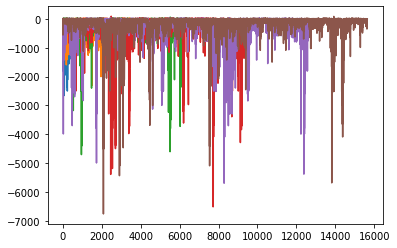

In [ ]:
environment = GridWorld()
agentQ = Q_Agent(environment)
TRAILS = []
WIN_PERCENTAGE= []
for t in range(1000,32000,6000):
  TRAILS.append(t)
  e_s,g_s,reward_per_episode,new_states, ghost_location,ghost_location_2,ghost_location_3,ghost_location_4,ghost_location_5,ghost_location_6,ghost_location_7  = play(environment, agentQ,trials=t, learn=True)
  win = len(e_s)/(len(e_s)+len(g_s))
  WIN_PERCENTAGE.append(win)
  print("Latest location of the ghost state :",ghost_location)
  print("Latest location of the ghost state_2 :",ghost_location_2)
  print("Latest location of the ghost state_3 :",ghost_location_3)
  print("Latest location of the ghost state_4 :",ghost_location_4)
  print("Latest location of the ghost state_5 :",ghost_location_5)
  print("Latest location of the ghost state_6 :",ghost_location_6)
  print("Latest location of the ghost state_7 :",ghost_location_7)
  print("Agent caught by a bomb :", len(g_s))
  print("Agent reached the end ", len(e_s))
  print("Agent reaching its goal vs Agent caught by bomb :",(len(e_s)/(len(e_s)+len(g_s)))*100,"% of time after", t, "iterations.")
# Simple learning curve

  plt.plot(reward_per_episode)

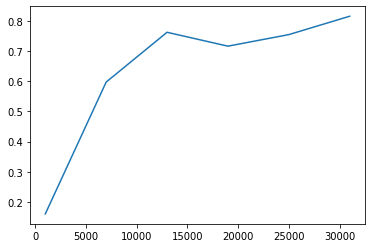

In [ ]:
plt.plot(TRAILS,WIN_PERCENTAGE)

As we can see from the above graph our agent is learning with each iteration & is reaching the end state more often than it did in earlier iterations.

[(0, 1), (0, 1), (0, 2), (0, 2), (1, 2), (0, 2), (0, 1), (0, 2), (0, 3), (0, 2), (1, 2), (1, 2), (0, 2), (0, 3), (0, 4), (1, 4), (1, 5), (0, 5), (0, 5), (0, 4), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 8), (1, 9), (2, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9), (10, 9), (11, 9), (12, 9), (12, 10), (12, 11), (13, 11), (13, 10), (14, 10), (15, 10), (16, 10), (15, 10), (16, 10), (17, 10), (18, 10), (19, 10), (20, 10), (21, 10), (21, 11), (21, 12), (21, 13), (21, 14), (21, 13), (21, 14), (21, 15), (21, 16), (21, 16), (21, 16), (21, 17), (21, 18), (21, 19), (21, 19), (21, 20), (21, 21), (21, 22), (21, 22), (21, 22), (21, 22), (21, 22), (21, 23), (22, 23), (23, 23), (24, 23), (24, 22), (24, 21), (24, 20), (24, 19), (24, 18), (24, 19), (24, 20), (24, 20), (24, 19), (23, 19), (24, 19), (24, 18), (24, 17), (24, 16), (24, 15), (24, 14), (24, 13), (24, 14), (24, 14), (24, 13), (24, 12), (24, 11), (24, 10), (24, 9), (24, 8), (24, 7), (24, 6), (24, 5), (24, 4), (2

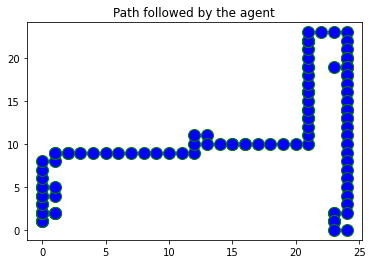

In [ ]:
print(new_states)
x_axis = []
y_axis = []
for i in new_states:
  x_axis.append(i[0])
  y_axis.append(i[1])
plt.plot(x_axis, y_axis, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.title('Path followed by the agent')
plt.show()

##Map showing how the agent reached its final goal.

In [ ]:
def showRoute(states,gl,gl_2,gl_3,gl_4,gl_5,gl_6,gl_7):
    board = np.zeros([25, 25])
    height = 25
    width = 25
    IS = (0, 0)
    D = (24, 0)
    G = gl
    G_2 = gl_2
    G_3 = gl_3
    G_4 = gl_4
    G_5 = gl_5
    G_6 = gl_6
    G_7 = gl_7
    # add grid marked as -1
    board[2:21, 5] = -math.inf
    board[2:21,0] = -math.inf
    board[2:21,2] = -math.inf
    board[2:21,8] = -math.inf
    board[5,11:24] = -math.inf
    board[8,11:24] = -math.inf
    board[11, 11:24] = -math.inf
    board[14,11:24] = -math.inf
    board[17,11:24] = -math.inf
    board[20,11:24] = -math.inf
    board[22,0:24] = -math.inf
        # Set random start locatio
    for i in range(0, height):
        print('---------------------------------------------------------------------------------------------------------------------------------')
        out = ' | '
        for j in range(0, width):
            token = '. '
            if board[i, j] == -math.inf:
                token = '▆'
            if (i, j) in states:
                token = '♛'
            if (i, j) == G:
                token = ' ☠️'
            if (i, j) == G_2:
                token = ' ☠️'
            if (i, j) == G_3:
                token = '☠️'
            if (i, j) == G_4:
                token = '☠️'
            if (i, j) == G_5:
                token = ' ☠️'
            if (i, j) == G_6:
                token = '☠️'
            if (i, j) == G_7:
                token = '☠️'
            if (i,j) == IS:
                token = 'IS'
            if (i,j) == D:
                token = ' 🍕 🍕'
            out += token + ' | '
        print(out)
    print('----------------------------------------------------------------------------------------------------------------------------')

In [ ]:
showRoute(new_states,ghost_location,ghost_location_2,ghost_location_3,ghost_location_4,ghost_location_5,ghost_location_6,ghost_location_7)

---------------------------------------------------------------------------------------------------------------------------------
 | IS | ♛ | ♛ | ♛ | ♛ | ♛ | ♛ | ♛ | ♛ | .  | .  | .  | .  | .  | .  | .  | .  | .  | .  | .  | .  | .  | .  | .  | .  | 
---------------------------------------------------------------------------------------------------------------------------------
 | .  | .  | ♛ | .  | ♛ | ♛ | .  | .  | ♛ | ♛ | .  | .  | .  | .  | .  | .  | .  | .  | .  | .  | .  | .  | .  | .  | ☠️ | 
---------------------------------------------------------------------------------------------------------------------------------
 | ▆ | .  | ▆ | .  | .  | ▆ | .  | .  | ▆ | ♛ | .  | .  | .  | .  | .  | .  | .  | .  | .  | .  | .  | .  | .  | .  | .  | 
---------------------------------------------------------------------------------------------------------------------------------
 | ▆ | .  | ▆ | .  |  ☠️ | ▆ |  ☠️ | .  | ▆ | ♛ | ☠️ | .  | .  | .  | .  | .  | .  | .  | .  | .  | .  | .  | .

**As we can see the the agent successfully reached its final destination.**